# Data Preprocessing

In [1]:
import numpy as np
import os
import math
import cv2
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

from sklearn.metrics import \
classification_report, accuracy_score, \
confusion_matrix, precision_score, \
recall_score, roc_curve, \
roc_auc_score, log_loss

from sklearn.preprocessing import label_binarize
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
IMG_SIZE = 150
DATA_DIR = "./PlantVillage"

CATEGORIES = []
data = []

## Loading Images as a label followed by every pixel's value Including RGB values
### Shape -> ( ROW x COLUMN x COLOR )
#### Label - 1x1x1 - 1x1x2 - 1x1x3 - 1x2x1 - 1x2x2 - 1x2x3 - ... - 1xNx3 - ... - 2xNx3 - ... - NxNx3

In [3]:
# List directories of DATA_DIR ( which are the categories )
for category in os.listdir(DATA_DIR):
    CATEGORIES.append(category)
    # Use Numeric Labels instead of Strings
    label = CATEGORIES.index(category)
    path = os.path.join(DATA_DIR, category)
    for img in os.listdir(path):
        try:
            # Read Image and resize it to IMG_SIZExIMG_SIZE
            # Read image colorized since color is important
            img_path = os.path.join(path, img)
            img_array = cv2.imread(img_path, cv2.IMREAD_COLOR)
            img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            # Data rows represent images
            # Row contains [ Numpy_Array_of_IMG_Pixels, Label ]
            # Reshape IMG array into 1-Dimensional Array
            data.append([img_array.flatten(), label])
        except Exception as e:
            # Ignore invalid Images
            pass


## Split Data into
### X -> IMG Pixels Array
### Y -> Labels

In [4]:
x_list = []
y_list = []

for img in data:
    x_list.append(img[0])
    y_list.append(img[1])

# Normalize Pixel RGB Values
x = np.array(x_list) / 255

# Reshape Label into 1-Dimensional Array after making Numpy Array ( Which is 2-D )
y = np.array(y_list).flatten()

## Free Memory of Unneeded Variables

In [5]:
import gc

del data
del x_list
del y_list
gc.collect()

0

## Splitting Data

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

### Shape of Data

In [7]:
print("Number of Columns (Pixels):", str(x_train.shape[1]))
print("Number of Training Samples:", str(x_train.shape[0]))
print("Number of Testing Samples:", str(x_test.shape[0]))

Number of Columns (Pixels): 67500
Number of Training Samples: 4106
Number of Testing Samples: 1369


# Logistic Regression

## Model

### Create Model

In [8]:
model = LogisticRegression(max_iter=1000, solver='liblinear', n_jobs=-1)

### Train Model

In [9]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

### Predict class using test data

In [10]:
y_pred = model.predict(x_test)
y_scores = model.predict_proba(x_test)

## Accuracy tests

In [11]:
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

print("Logistic Regression Results:")
print()
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("AUC:", roc_auc_score(y_test_bin, y_scores, average="weighted", multi_class="ovr"))

Logistic Regression Results:

Accuracy: 0.7808619430241052
Precision: 0.7814315434611699
Recall: 0.7808619430241052
AUC: 0.9425307804714034


Confusion Matrix for Logistic Regression:


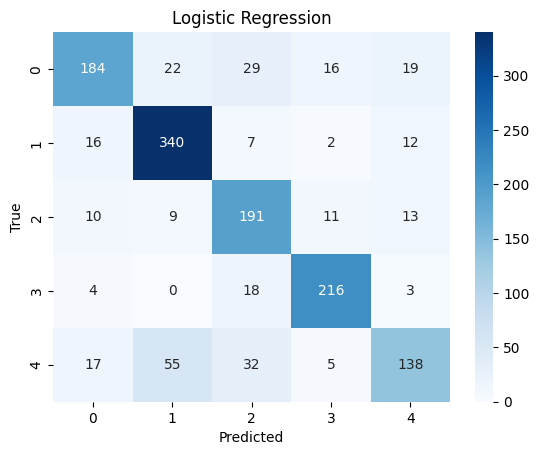

In [12]:
print("Confusion Matrix for Logistic Regression:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

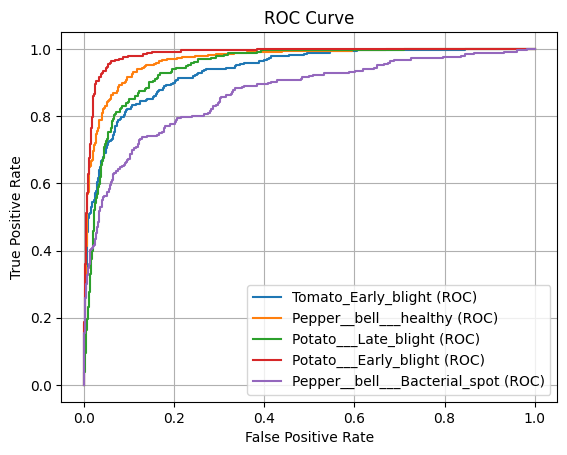

In [13]:
# Plot ROC curve for each class
for i, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    plt.plot(fpr, tpr, label=f'{CATEGORIES[cls]} (ROC)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

# KNN

## Model

### Create Model

In [28]:
K = 3
model = KNeighborsClassifier(n_neighbors=K, metric="minkowski", p=2, n_jobs=-1)

### Train Model

In [29]:
model.fit(x_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=3)

### Predict class using test data

In [30]:
y_pred = model.predict(x_test)
y_scores = model.predict_proba(x_test)

## Accuracy tests

In [31]:
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

print("KNearestNeighbor Results:")
print()
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("AUC:", roc_auc_score(y_test_bin, y_scores, average="weighted", multi_class="ovr"))

KNearestNeighbor Results:

Accuracy: 0.5493060628195763
Precision: 0.6888141730942993
Recall: 0.5493060628195763
AUC: 0.8117839064820962


Confusion Matrix for KNearestNeighbor:


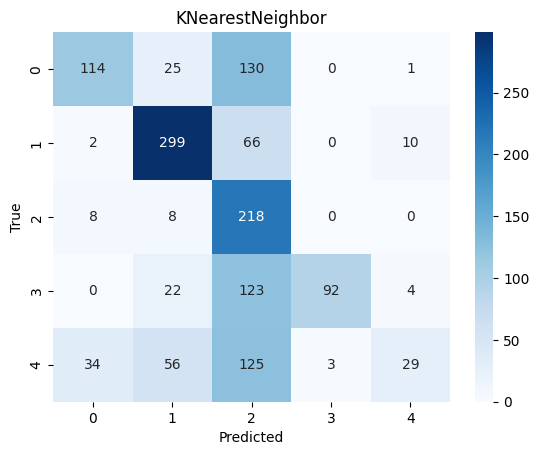

In [32]:
print("Confusion Matrix for KNearestNeighbor:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("KNearestNeighbor")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

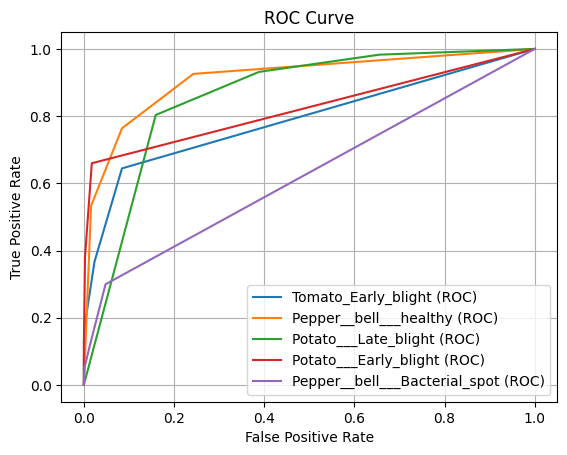

In [33]:
# Plot ROC curve for each class
for i, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    plt.plot(fpr, tpr, label=f'{CATEGORIES[cls]} (ROC)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

In [34]:
CATEGORIES

['Tomato_Early_blight',
 'Pepper__bell___healthy',
 'Potato___Late_blight',
 'Potato___Early_blight',
 'Pepper__bell___Bacterial_spot']